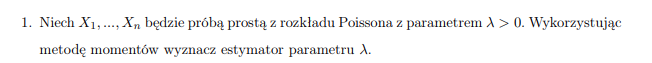

In [8]:
import numpy as np
import matplotlib.pyplot as plt

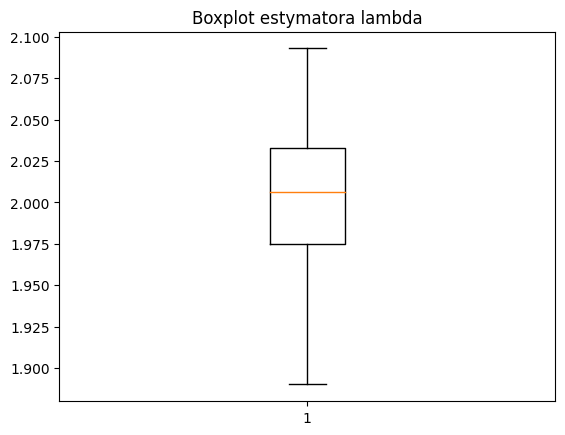

In [9]:
n_pois = 1000
n_samples = 100
lambda_ = 2
samples_pois = [np.random.poisson(lambda_, n_pois) for n in range(n_samples)]
lambda_estims = [np.mean(sample_pois) for sample_pois in samples_pois]
plt.boxplot(lambda_estims)
plt.title("Boxplot estymatora lambda")
plt.show()